<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/twyncoder/dl-handson/blob/master/HandsOn_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

# Redes de Aprendizaje Profundo básicas con Keras y Tensorflow.
## *(A) Deep Neural Networks (DNN) para clasificación multi-clase*

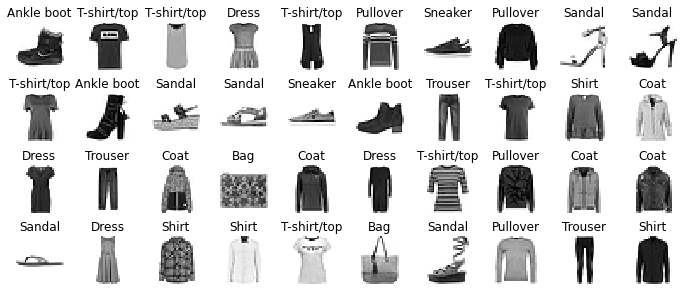

## 0. Preparación del entorno y comprobación de requisitos

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"
from tensorflow import keras

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


### Información de versiones

In [2]:
tf.__version__

'2.4.2'

In [3]:
keras.__version__

'2.4.0'

### Comprobar si disponemos de una GPU

In [4]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## 1. Inspeccionar los datos y crear subconjuntos train, test, validation

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

**¡AHORA TÚ!** 
- ¿Cuántas muestras tiene el set de entrenamiento? La función `load_data()`devuelve arrays de numpy. Puedes utilizar alguna propiedad de estos arrays para comprobarlo.
- ¿Cuántas tiene el set de test?

In [7]:
X_train_full.dtype

dtype('uint8')

**¡AHORA TÚ!** 
- ¿Qué significa que el tipo de dato `uint8`
- ¿Qué valores puede almacenar y en qué rango?

In [8]:
y_train_full

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

**¡AHORA TÚ!** 
- ¿Qué representan `y_train_full` e `y_test`? 
- Utiliza alguna función de numpy para conocer qué posibles valores puede tener

In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [11]:
class_names[y_train_full[0]]

'Ankle boot'

### Crear subconjunto de datos para validación

In [12]:
X_train, X_valid = X_train_full[:55000], X_train_full[55000:]
y_train, y_valid = y_train_full[:55000], y_train_full[55000:]
print(X_train.shape)

(55000, 28, 28)


**(OPCIONAL) ¡AHORA TÚ!** 
- Prueba otra manera de dividir las señales haciendo uso de `train_test_split()` de scikit-learn.
- Puedes utilizar `shuffle = False` para obtener la misma división entre subconjuntos que arriba

### Normalizar las entradas

In [14]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

**¡AHORA TÚ!** 
- ¿Qué valores toman los píxeles? ¿Cuál es el valor máximo que puede tomar un píxel?
- Normaliza las imágenes en (X_train, X_valid y X_test) para que tomen valores entre 0 y 1

### Examinar los datos

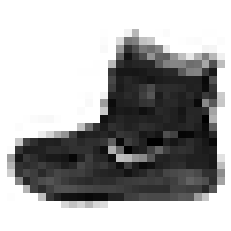

Ankle boot


In [16]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()
print(class_names[y_train[0]])

**¡AHORA TÚ!** 
- Prueba a observar otras imágenes
- También puedes crear una función para facilitar el trabajo y poder reutilizarla después
- Puedes definirla como `def print_example(image,label):`

**(OPCIONAL) ¡AHORA TÚ!** 
- Busca la diferencia entre cmap "binary" y "gray". Prueba este último.  https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html
- Como norma general, en una imagen en escala de grises, un píxel blanco toma valor 255 y un píxel negro toma valor 0
- Examina los valores de los píxeles de alguna imagen ¿Según este criterio el fondo de la imagen sería blanco o negro?
- Quizás quieras añadir la opción `plt.colorbar()`
 en tu función para ver una leyenda de niveles de grises en tus imágenes

## 2. Definiendo la red neuronal

### Regresor lineal simple

In [21]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


**¡AHORA TÚ!** 
- Para el modelo de red neuronal anterior, ¿cómo se calcula el número de parámetros?
- ¿Qué efecto tiene que la función de activación de la última capa sea de tipo 'softmax'?
- ¿Qué beneficio tiene softmax para problemas de clasificación multiclase?

#### *Otra forma de representar el modelo de red neuronal*

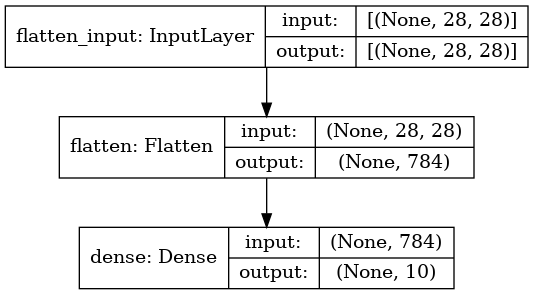

In [23]:
keras.utils.plot_model(model, show_shapes=True)

In [24]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

Esto es equivalente a:

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

**¡AHORA TÚ!** 
- Busca información sobre el método compile para responder a las siguientes preguntas
- ¿Podríamos haber utilizado 'categorical_crossentropy'?
- ¿Qué significa sgd? ¿Qué otros optimizer podríamos haber empleado?

#### Entrenamiento de la red

In [26]:
history = model.fit(X_train, y_train, epochs=15,
                    validation_data=(X_valid, y_valid))

Epoch 1/15
1719/1719 [==============================] - 2s 1ms/step - loss: 1.1325 - accuracy: 0.6378 - val_loss: 0.6394 - val_accuracy: 0.7848
Epoch 2/15
1719/1719 [==============================] - 1s 795us/step - loss: 0.6189 - accuracy: 0.8008 - val_loss: 0.5608 - val_accuracy: 0.8116
Epoch 3/15
1719/1719 [==============================] - 1s 806us/step - loss: 0.5600 - accuracy: 0.8157 - val_loss: 0.5237 - val_accuracy: 0.8210
Epoch 4/15
1719/1719 [==============================] - 1s 807us/step - loss: 0.5305 - accuracy: 0.8264 - val_loss: 0.5003 - val_accuracy: 0.8298
Epoch 5/15
1719/1719 [==============================] - 1s 794us/step - loss: 0.5083 - accuracy: 0.8310 - val_loss: 0.4891 - val_accuracy: 0.8298
Epoch 6/15
1719/1719 [==============================] - 1s 803us/step - loss: 0.4972 - accuracy: 0.8334 - val_loss: 0.4748 - val_accuracy: 0.8372
Epoch 7/15
1719/1719 [==============================] - 1s 803us/step - loss: 0.4867 - accuracy: 0.8380 - val_loss: 0.4665 - v

**¡AHORA TÚ!** 
- ¿Qué precisión se está consiguiendo con el set de validación? 
- Observa que si vuelves a ejecutar la celda anterior, la red sigue aprendiendo donde lo dejó. Podríamos seguir entrenando, pero este cuasi-modelo de red es muy básico...
- ¡Vamos a ver si podemos crear y entrenar un mejor modelo en la siguiente sección!

## Tu primera Deep Neural Network

**¡AHORA TÚ!** 
- Crea un nuevo modelo de red 'model2' e incluye esta vez dos capas intermedias antes de la última capa
- Tienes libertad para elegir el número de neuronas de cada capa (elige valores entre 100 y 500 por ejemplo)
- Utiliza una función de activación que permita introducir una no linealidad
- ¿Cuántos parámetros tiene el nuevo modelo? Compara este número con el del modelo anterior

In [28]:
model2.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

**¡AHORA TÚ!**
- Entrena la red durante 25 epochs, ¿qué precisión has obtenido esta vez?

#### Visualizando gráficamente la evolución del entrenamiento

In [30]:
history.params

{'verbose': 1, 'epochs': 25, 'steps': 1719}

In [31]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


In [32]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Saving figure keras_learning_curves_plot


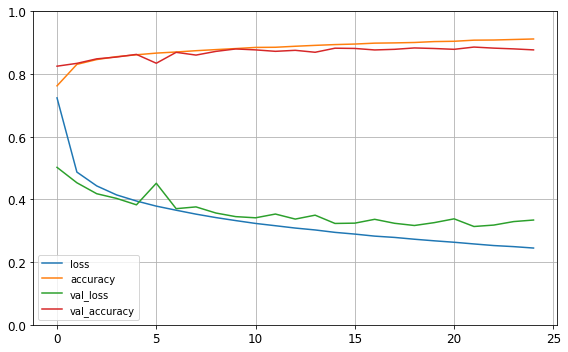

In [33]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()

**¡AHORA TÚ!**
- Interpreta las gráficas que has obtenido
- Quizás puedas comparar tus resultados con los obtenidos por otros compañeros

#### Midiendo el rendimiento con el set de test

In [34]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 743us/step - loss: 0.4766 - accuracy: 0.8328


[0.4766395390033722, 0.8327999711036682]

**¡AHORA TÚ!**
- ¿Qué devuelve el método _model.evaluate()_?
- ¿Cómo se compara el resultado con el obtenido en el set de validación?
- ¿Se ha producido overfitting? Para responder a esta pregunta compara las curvas de _loss_ y _val_loss_  en la gráfica que hicimos antes

#### Vamos a ver si la red acierta con algunos ejemplos del set de test

In [86]:
N = 50
X_new = X_test[N:N+10]
y_new = y_test[N:N+10]
print(y_new)

[4 4 5 8 2 2 8 4 8 0]


In [92]:
y_pred = model.predict(X_new)
print(y_pred.round(2))
print(np.argmax(y_pred,axis=-1))

[[0.   0.   0.21 0.   0.3  0.   0.48 0.   0.01 0.  ]
 [0.01 0.01 0.44 0.01 0.13 0.01 0.38 0.   0.02 0.  ]
 [0.01 0.02 0.01 0.04 0.   0.52 0.03 0.28 0.02 0.06]
 [0.01 0.   0.02 0.   0.   0.   0.63 0.   0.33 0.  ]
 [0.02 0.02 0.64 0.03 0.23 0.   0.05 0.   0.01 0.  ]
 [0.02 0.   0.83 0.   0.   0.   0.14 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   1.   0.  ]
 [0.   0.   0.39 0.   0.49 0.   0.11 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   1.   0.  ]
 [0.84 0.01 0.04 0.01 0.01 0.   0.09 0.   0.   0.  ]]
[6 2 5 6 2 2 8 4 8 0]


**¡AHORA TÚ!**
- ¿Con qué probabilidad se ha predicho la clase de cada una de las imágenes anteriores?
- ¿Alguna de ellas se ha predicho incorrectamente?
- Observa que <code>model.predict()</code> espera recibir un array de unas determinadas dimensiones <code>(None, 28, 28)</code>. Busca la manera de proporcionarle una única imagen, por ejemplo <code>X_new[0]</code>

**¡AHORA TÚ!**
- Escribe una función <code>print_prediction(model,image,label)</code> que reciba un ejemplo de test y su etiqueta verdadera
- Deberá imprimir o devolver la clase inferida
- Haz que imprima la etiqueta y la clase inferida en forma de texto 

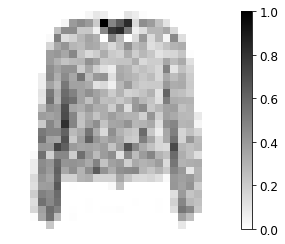

Etiqueta real:  Coat(4)
Clase inferida: Pullover(2)


In [118]:
N=1
print_prediction(model2,X_new[N],y_new[N])

In [ ]:
model2.save("mi_primera_dnn.h5")

In [ ]:
model3 = keras.models.load_model("mi_primera_dnn.h5")

In [ ]:
N=5
print_prediction(model3,X_new[N],y_new[N])

**¡AHORA TÚ!**
- Descarga el archivo <code>mi_primera_dnn.h5</code> desde <code>File-->Open...</code> y guárdalo para la siguiente sesión

# Ejercicios opcionales

## (A) Examinando los valores de weights y bias de una capa de la red

In [ ]:
model2.layers

In [ ]:
keras.utils.plot_model(model2, "mi_primera_dnn.png", show_shapes=True)

In [ ]:
hidden1 = model2.layers[1]
hidden1.name

In [ ]:
model2.get_layer(hidden1.name) is hidden1

In [ ]:
weights, biases = hidden1.get_weights()

In [ ]:
weights

In [ ]:
weights.shape

In [ ]:
biases

In [ ]:
biases.shape

## (B) Prueba a entrenar una red para reconocer caracteres sobre el dataset MNIST

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

# Referencias

- Este notebook está inspirado en varias fuentes, pero fundamentalmente https://github.com/ageron/handson-ml2